## 로이터 데이터셋

1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋입니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.

[과제] 로이터 데이터셋을 불러와서 아래 사항을 참조하여 다중 분류를 keras 신경망 모델을 이용하여 수행하세요.

- 데이터 벡터화
- 모델 구성: input_shape=1000,  
출력 layer 활성화 함수 = softmax
- epochs 20으로 훈련 및 검증 결과를 시각화 후 과대적합이 시작되는 epoch 확인하여 기술

In [38]:
from tensorflow.keras.datasets import reuters

(train_data, train_label), (test_data,test_label) = reuters.load_data(num_words=10000)

In [39]:
print(train_data.shape, test_data.shape)

(8982,) (2246,)


In [40]:
# 재미삼아 디코딩
reverse = dict([(value, key) for (key, value) in reuters.get_word_index().items()])
' '.join(reverse.get(i-3, '?') for i in train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [41]:
# 데이터 벡터화
import numpy as np

def vectorize(seqeunce, dimension=10000):
  result = np.zeros((len(seqeunce), dimension))
  for i, seq in enumerate(seqeunce):
    result[i, seq] = 1.
  return result

In [42]:
X_train = vectorize(train_data)
X_test = vectorize(test_data)

In [43]:
# 레이블 벡터화
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)

# 만약 위의 사용자 함수처럼 하고 싶다면 dimension만 46으로 바꿔주면 됨
# 왜 46이냐고? 분류 결과가 46개거든. 토픽 46개.

In [44]:
print(X_train[0])
print(y_train[0])
print(X_train.shape, y_train.shape)

[0. 1. 1. ... 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(8982, 10000) (8982, 46)


In [45]:
# 각 층은 이전 층에서 보내온 정보만 수령할 수 있음
# 따라서, 이전 층에서의 레이어 깊이가 충분치 않으면 [정보 누락]이 생기고, 이는 곧 정보의 병목현상이라 볼 수 있다
# 이진 분류보다는 분류할 것들이 많아졌으니 레이어의 깊이를 64로 늘려보자

from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu')) # 2개의 은닉층...인데 첫 번째는 입력층도 겸하는
model.add(layers.Dense(46, activation='softmax')) # 출력층. 다중분류에는 소프트맥스 함수가 적절하외다.

# 소프트맥스 까먹었을까 봐
# 각 입력 샘플마다 각 분류에 속할 확률을 출력함. 지금 토픽이 46개이므로 출력값은 해당 토픽들에 속할 확률이 되겠지. 이 배열의 합은 1일 테고.

In [46]:
# 훈련 검증
# 데이터 자체가 쪼끄마하니까 1천 개만 하자

X_val = X_train[:1000]
X_part = X_train[1000:]
y_val = y_train[:1000]
y_part = y_train[1000:]

In [47]:
# 모델 컴파일
# 다중 분류이기 때문에 categorical_crossentropy
# 네트워크가 예측한 확률분포와 실제 확률분포 사이의 거리가 곧 손실 정도라, 그것을 최소화하는 방향으로 갈 것임

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model.fit(X_part, y_part,
                    epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 67ms/step - loss: 2.7368 - accuracy: 0.5188 - val_loss: 1.8505 - val_accuracy: 0.6230
Epoch 2/20
16/16 [==============================] - 1s 57ms/step - loss: 1.4725 - accuracy: 0.6974 - val_loss: 1.3047 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 1s 56ms/step - loss: 1.0547 - accuracy: 0.7741 - val_loss: 1.1236 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 1s 58ms/step - loss: 0.8269 - accuracy: 0.8254 - val_loss: 1.0341 - val_accuracy: 0.7950
Epoch 5/20
16/16 [==============================] - 1s 58ms/step - loss: 0.6636 - accuracy: 0.8644 - val_loss: 0.9603 - val_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 1s 55ms/step - loss: 0.5311 - accuracy: 0.8906 - val_loss: 0.9315 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 55ms/step - loss: 0.4300 - accuracy: 0.9116 - val_loss: 0.9016 - val_accuracy: 0.8150
Epoch 8/20
16

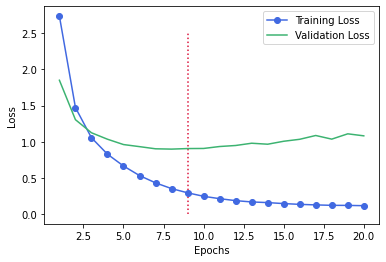

In [49]:
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, color='royalblue', marker='o', label='Training Loss')
plt.plot(epochs, val_loss, color='mediumseagreen', label='Validation Loss')
plt.vlines(9,0,2.5, color='crimson', linestyles=':')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.close()

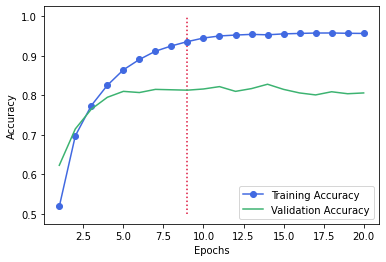

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, color='royalblue', marker='o', label='Training Accuracy')
plt.plot(epochs, val_acc, color='mediumseagreen', label='Validation Accuracy')
plt.vlines(9,0.5,1, color='crimson', linestyles=':')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.close()

## 도대체 왜 나 책이랑 계속 다르게 나오냐...? ㅎㅎ....?

In [51]:
pred = model.predict(X_test)

In [52]:
sum(pred[0]) # 거의 1에 가깝지. 확률의 총합이니까.

1.0000000226448382

In [53]:
print(pred[0].shape, np.argmax(pred[0]))
# 46개의 토픽 분류 중에서 그 확률값이 가장 높은 놈의 인덱스가 곧 해당 기사의 토픽이 되겠다.

(46,) 3


#### 추가 과제
- 유닛의 수를 32개, 128개로 조정해서 수행
- 은닉 층을 1개, 3개로 변경하면서 수행

In [54]:
# 은닉 층 1개, 유닛 수 32개

m1 = models.Sequential()
m1.add(layers.Dense(32, activation='relu', input_shape=(10000,))) # 입력층과 은닉층을 겸하는 단일 층으로 가보자
m1.add(layers.Dense(46,activation='softmax')) # 출력층

m1.compile(optimizer='rmsprop',
           loss='categorical_crossentropy',
           metrics=['acc'])

h1 = m1.fit(X_part, y_part,
       epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 53ms/step - loss: 2.8810 - acc: 0.3991 - val_loss: 2.1924 - val_acc: 0.5620
Epoch 2/20
16/16 [==============================] - 1s 41ms/step - loss: 1.8578 - acc: 0.6495 - val_loss: 1.6599 - val_acc: 0.6650
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.4252 - acc: 0.7212 - val_loss: 1.4055 - val_acc: 0.7160
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 1.1748 - acc: 0.7608 - val_loss: 1.2480 - val_acc: 0.7350
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.9998 - acc: 0.7895 - val_loss: 1.1476 - val_acc: 0.7540
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8629 - acc: 0.8172 - val_loss: 1.0752 - val_acc: 0.7760
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.7500 - acc: 0.8410 - val_loss: 1.0152 - val_acc: 0.7830
Epoch 8/20
16/16 [==============================] - 1s 41ms/step - loss: 0.6536 - a

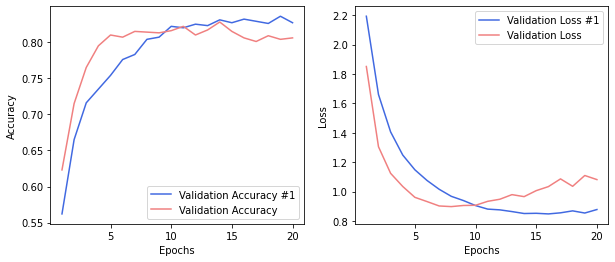

In [55]:
acc1 = h1.history['acc']
val_acc1 = h1.history['val_acc']
val_loss1 = h1.history['val_loss']
epochs = range(1, len(acc)+1)

fig, [ax1, ax2] = plt.subplots(figsize=(10,4), ncols=2)

ax1.plot(epochs, val_acc1, color='royalblue', label='Validation Accuracy #1')
ax1.plot(epochs, val_acc, color='lightcoral', label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, val_loss1, color='royalblue', label='Validation Loss #1')
ax2.plot(epochs, val_loss, color='lightcoral', label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()
plt.close()
# 검증 세트 정확도가 좀 떨어지는 게 맞...는 것 같은데
# 뭔가 내 마음에 드는 결과는 아닌 듯함. 원래는 은닉 층 개수도 줄고 레이어 깊이도 얕아져서 정확도가 떨어지는 게 맞지 않나?
# 그렇다기 보단 모델이 데이터에 대해 '둔감해졌다'고 해석하는 게 맞을지도 모르겠다.
# 전체적으로 그래프가 무던하게 나오는 걸로 봐서는...

In [57]:
# 은닉 층 3개, 유닛 수 128개

m2 = models.Sequential()
m2.add(layers.Dense(128, activation='relu', input_shape=(10000,))) # 입력층
m2.add(layers.Dense(128, activation='relu'))
m2.add(layers.Dense(128, activation='relu'))
m2.add(layers.Dense(46,activation='softmax')) # 출력층

m2.compile(optimizer='rmsprop',
           loss='categorical_crossentropy',
           metrics=['acc'])

h2 = m2.fit(X_part, y_part,
       epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 101ms/step - loss: 2.1870 - acc: 0.5304 - val_loss: 1.4040 - val_acc: 0.6750
Epoch 2/20
16/16 [==============================] - 1s 85ms/step - loss: 1.1569 - acc: 0.7399 - val_loss: 1.1487 - val_acc: 0.7480
Epoch 3/20
16/16 [==============================] - 1s 86ms/step - loss: 0.8217 - acc: 0.8142 - val_loss: 1.1309 - val_acc: 0.7610
Epoch 4/20
16/16 [==============================] - 1s 85ms/step - loss: 0.5897 - acc: 0.8683 - val_loss: 1.1097 - val_acc: 0.7540
Epoch 5/20
16/16 [==============================] - 1s 85ms/step - loss: 0.4475 - acc: 0.8989 - val_loss: 1.0701 - val_acc: 0.7740
Epoch 6/20
16/16 [==============================] - 1s 86ms/step - loss: 0.3322 - acc: 0.9263 - val_loss: 0.9972 - val_acc: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 88ms/step - loss: 0.2721 - acc: 0.9364 - val_loss: 1.0007 - val_acc: 0.7920
Epoch 8/20
16/16 [==============================] - 1s 85ms/step - loss: 0.2120 - 

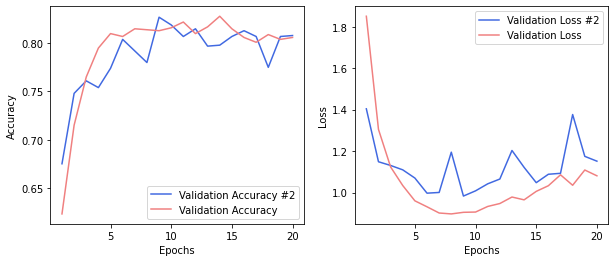

In [58]:
val_acc2 = h2.history['val_acc']
val_loss2 = h2.history['val_loss']
epochs = range(1, len(acc)+1)

fig, [ax1, ax2] = plt.subplots(figsize=(10,4), ncols=2)

ax1.plot(epochs, val_acc2, color='royalblue', label='Validation Accuracy #2')
ax1.plot(epochs, val_acc, color='lightcoral', label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, val_loss2, color='royalblue', label='Validation Loss #2')
ax2.plot(epochs, val_loss, color='lightcoral', label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()
plt.close()

# 갑자기 들쑥날쑥 난리가 났다. 층의 깊이를 깊게 하고 은닉 층을 늘렸는데
# 정교한 결과가 나오는 게 아니라 에포크가 진행될수록 변화에 아주 민감하게 반응하는 결과가 나온 것이다.
# 모델이 데이터에 지나치게 둔감해도, 지나치게 민감해도 안 좋다는 것을 확인 가능.